In [1]:
import pickle
import numpy as np
import pandas as pd
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, cross_validate

In [2]:
# Load the diabetes dataset to a pandas DataFrame
df = pd.read_csv('heart_failure_clinical_records_dataset.csv') 

# Print the first 5 rows of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

In [8]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

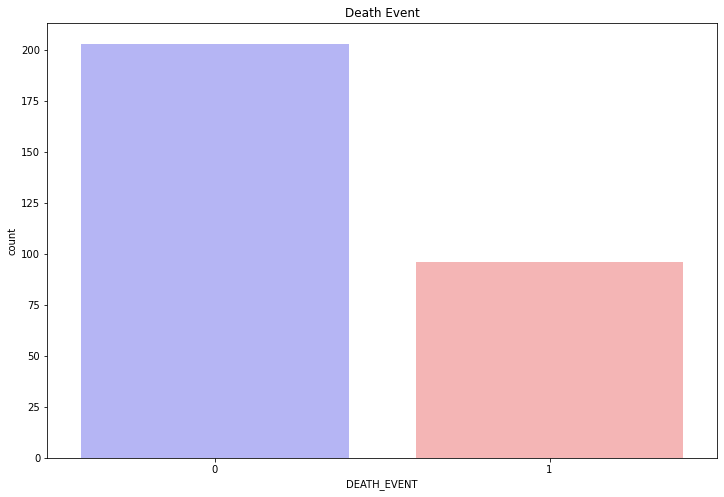

In [54]:
plt.figure(figsize = (12,8))
sns.countplot(x="DEATH_EVENT",data=df,palette="bwr")
plt.title('Death Event')
plt.show()

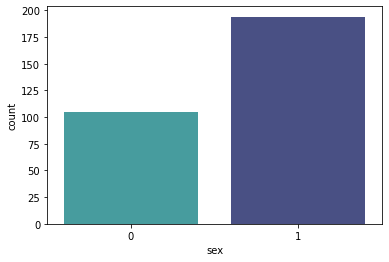

In [14]:
sns.countplot(x='sex',data=df,palette="mako_r")
plt.show()

In [15]:
df.groupby('DEATH_EVENT').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


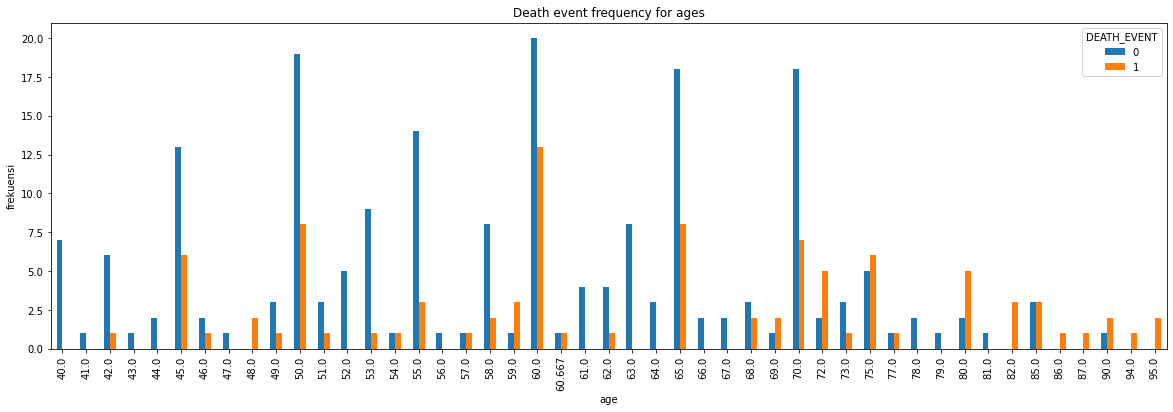

In [16]:
pd.crosstab(df.age,df.DEATH_EVENT).plot(kind="bar",figsize=(20,6))
plt.title('Death event frequency for ages')
plt.xlabel('age')
plt.ylabel('frekuensi')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


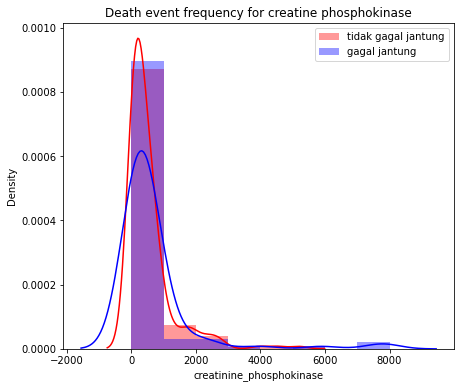

In [58]:
plt.figure(figsize=(7,6))
sns.distplot(df.creatinine_phosphokinase[df.DEATH_EVENT==0],bins=[0,1000,2000,3000,4000,5000,6000,7000,8000],color="r",label="tidak gagal jantung")
sns.distplot(df.creatinine_phosphokinase[df.DEATH_EVENT==1],bins=[0,1000,2000,3000,4000,5000,6000,7000,8000],color="b",label="gagal jantung")
plt.title('Death event frequency for creatine phosphokinase')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


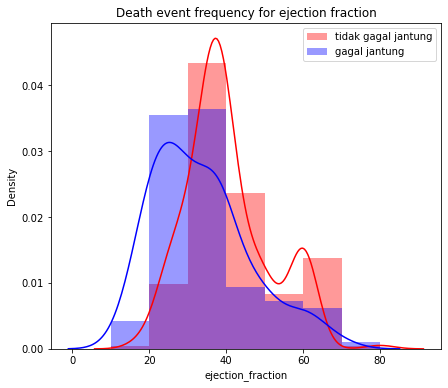

In [60]:
plt.figure(figsize=(7,6))
sns.distplot(df.ejection_fraction[df.DEATH_EVENT==0],bins=[0,10,20,30,40,50,60,70,80],color="r",label="tidak gagal jantung")
sns.distplot(df.ejection_fraction[df.DEATH_EVENT==1],bins=[0,10,20,30,40,50,60,70,80],color="b",label="gagal jantung")
plt.title('Death event frequency for ejection fraction')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


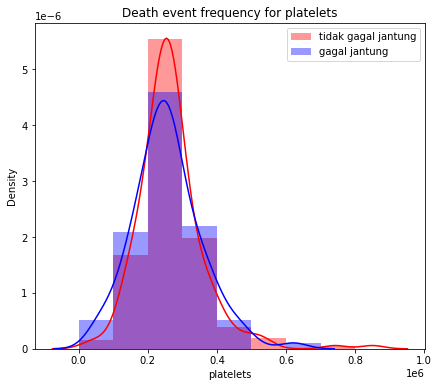

In [61]:
plt.figure(figsize=(7,6))
sns.distplot(df.platelets[df.DEATH_EVENT==0],bins=[0,100000,200000,300000,400000,500000,600000,700000,800000],color="r",label="tidak gagal jantung")
sns.distplot(df.platelets[df.DEATH_EVENT==1],bins=[0,100000,200000,300000,400000,500000,600000,700000,800000],color="b",label="gagal jantung")
plt.title('Death event frequency for platelets')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


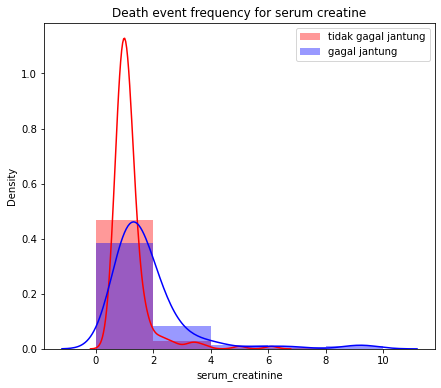

In [62]:
plt.figure(figsize=(7,6))
sns.distplot(df.serum_creatinine[df.DEATH_EVENT==0],bins=[0,2,4,6,8,10],color="r",label="tidak gagal jantung")
sns.distplot(df.serum_creatinine[df.DEATH_EVENT==1],bins=[0,2,4,6,8,10],color="b",label="gagal jantung")
plt.title('Death event frequency for serum creatine')
plt.legend()


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


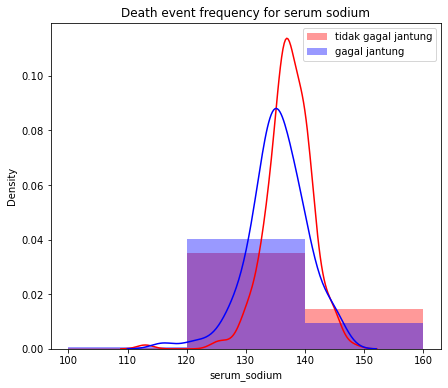

In [63]:
plt.figure(figsize=(7,6))
sns.distplot(df.serum_sodium[df.DEATH_EVENT==0],bins=[100,120,140,160],color="r",label="tidak gagal jantung")
sns.distplot(df.serum_sodium[df.DEATH_EVENT==1],bins=[100,120,140,160],color="b",label="gagal jantung")
plt.title('Death event frequency for serum sodium')
plt.legend()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


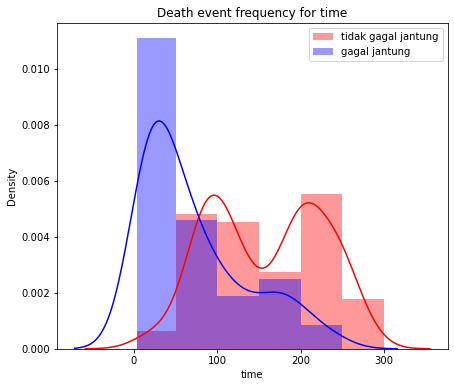

In [64]:
plt.figure(figsize=(7,6))
sns.distplot(df.time[df.DEATH_EVENT==0],bins=[4,50,100,150,200,250,300],color="r",label="tidak gagal jantung")
sns.distplot(df.time[df.DEATH_EVENT==1],bins=[4,50,100,150,200,250,300],color="b",label="gagal jantung")
plt.title('Death event frequency for time')
plt.legend()

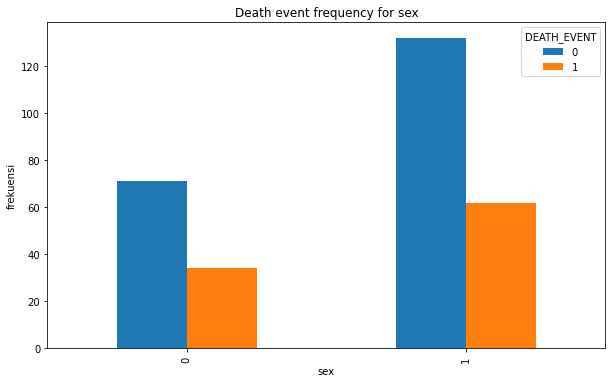

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-p

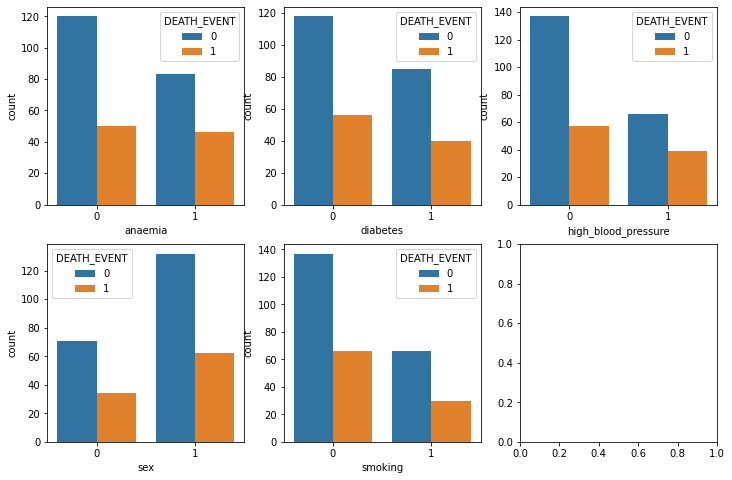

In [65]:
variabel_category=["anaemia","diabetes","high_blood_pressure","sex","smoking"]

fig,axes=plt.subplots(2,3,figsize=(12,8))

for category,ax in zip(variabel_category,axes.flatten()):
    sns.countplot(category,data=df,hue="DEATH_EVENT",ax=ax)


In [50]:
# separating the data and labels
X = df.drop(columns = 'DEATH_EVENT', axis=1)
Y = df['DEATH_EVENT']

In [51]:
#Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(299, 12) (239, 12) (60, 12)


In [52]:
# PEMODELAN MENGGUNAKAN KNN
clf = KNeighborsClassifier(n_neighbors=3)

# FITTING DATA TRAINING
clf.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
#Evaluating Model
input_data =(55,0,150,1,20,0,162000,1.8,130,0,1,6)

# Change the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('pasien tidak meninggal')
else:
  print('pasien meninggal')

[1]
pasien meninggal


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Save the trained model
filename = 'trained_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))